In [1]:
#importer les packages!!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [5]:
#collection des données (datasets)
files= [file for file in os.listdir(r'C:\Users\sance\Desktop\M1\Python\Projet Data M1\miniProjetPyton')]
for file in files:
    print(file)

April.csv
August.csv
December.csv
February.csv
January.csv
July.csv
June.csv
March.csv
May.csv
November.csv
October.csv
September.csv


In [6]:
#création d'une bd vide et concaténation des données pour obtenir le nombre total de ligne et de colonnes.
path=r'C:\Users\sance\Desktop\M1\Python\Projet Data M1\miniProjetPyton'

All_Sales_Data=pd.DataFrame()
for file in files:
         current_data=pd.read_csv(path+'/'+file)
         All_Sales_Data=pd.concat([All_Sales_Data,current_data])
print(All_Sales_Data)


      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19/19 08:46             917 1st St, 

In [7]:
#associer les données en un seul fichier all_data
All_Sales_Data.to_csv(path+'/All_Sales_Data.csv',index=False)

# NETOYAGE DES DONNEES

In [8]:
#netoyage des données, le type!
All_Sales_Data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [9]:
All_Sales_Data.dtypes

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [10]:
#recherche de valeurs manquantes
All_Sales_Data.isnull().sum()

Order ID              545
Product             15699
Quantity Ordered    15699
Price Each          15699
Order Date          15699
Purchase Address    15699
dtype: int64

In [11]:
#suppression des valeurs manquantes
All_Sales_Data=All_Sales_Data.dropna(how='any')
All_Sales_Data.shape

(171151, 6)

In [12]:
#vérification
All_Sales_Data.dropna().isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [13]:
#Nouvelle dataset!!
All_Sales_Data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [23]:
# Suppression des mauvaises entrées
All_Sales_Data = All_Sales_Data[All_Sales_Data['Quantity Ordered']!='Quantity Ordered']

# CHANGEMENT DE TYPES ET ENRICHISSEMENT DES DONNEES

In [24]:
#Changement des types
All_Sales_Data['Order Date']= pd.to_datetime(All_Sales_Data['Order Date'],errors='coerce')

All_Sales_Data['Price Each']= pd.to_numeric(All_Sales_Data['Price Each'],errors='coerce')

All_Sales_Data['Quantity Ordered'] = All_Sales_Data['Quantity Ordered'].astype(int)

All_Sales_Data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [16]:
All_Sales_Data.index

Int64Index([    0,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            11676, 11677, 11678, 11679, 11680, 11681, 11682, 11683, 11684,
            11685],
           dtype='int64', length=170796)

In [25]:
# Mise en index de Order Date
All_Sales_Data = All_Sales_Data.set_index('Order Date')

In [26]:
All_Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001"
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215"
2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001"
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001"
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001"


In [27]:
# Tri et mise en ordre des index
All_Sales_Data.sort_index(inplace=True)

In [28]:
All_Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001"
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016"
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001"
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001"
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301"


In [29]:
#Création du mois en fonction de l'index
All_Sales_Data['Mois'] = All_Sales_Data.index.month_name()

In [30]:
All_Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Mois
Order Date,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January


In [31]:
# liste des villes uniques
All_Sales_Data['Purchase Address'].unique()

array(['9 Lake St, New York City, NY 10001',
       '760 Church St, San Francisco, CA 94016',
       '735 5th St, New York City, NY 10001', ...,
       '731 7th St, New York City, NY 10001',
       '754 Hickory St, New York City, NY 10001',
       '657 Spruce St, New York City, NY 10001'], dtype=object)

In [32]:
# Extraction de la ville dans l'adresse
def get_City(addresse):
  return addresse.split(',')[1].strip()

In [33]:
# Résultat
get_City("735 5th St, New York City, NY 10001")

'New York City'

In [34]:
All_Sales_Data['city'] = All_Sales_Data['Purchase Address'].apply(get_City)


In [35]:
All_Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Mois,city
Order Date,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,New York City
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,San Francisco
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,New York City
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,Dallas
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,Atlanta


# EXPLORATION DES DONNEES

In [36]:
# Ajout de la colonne total
All_Sales_Data["Total"] = All_Sales_Data['Price Each'] * All_Sales_Data['Quantity Ordered']
All_Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Mois,city,Total
Order Date,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,New York City,11.99
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,San Francisco,11.95
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,New York City,150.00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,Dallas,2.99
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,Atlanta,23.90


In [37]:
# Valeur maximale
All_Sales_Data[['Mois', 'Total']][All_Sales_Data.Total==All_Sales_Data['Total'].max()].drop_duplicates()

,Mois,Total
Order Date,,
2019-04-22 12:48:00,April,3400.0
2019-05-13 13:40:00,May,3400.0
2019-06-08 09:00:00,June,3400.0


In [38]:
All_Sales_Data.groupby('city').sum()["Total"].sort_values(ascending=False)

city
San Francisco    7570046.60
Los Angeles      5022588.47
New York City    4294119.21
Boston           3360578.46
Atlanta          2563687.21
Dallas           2544998.72
Seattle          2528242.95
Portland         2133675.58
Austin           1665035.47
Name: Total, dtype: float64

<AxesSubplot:ylabel='city'>

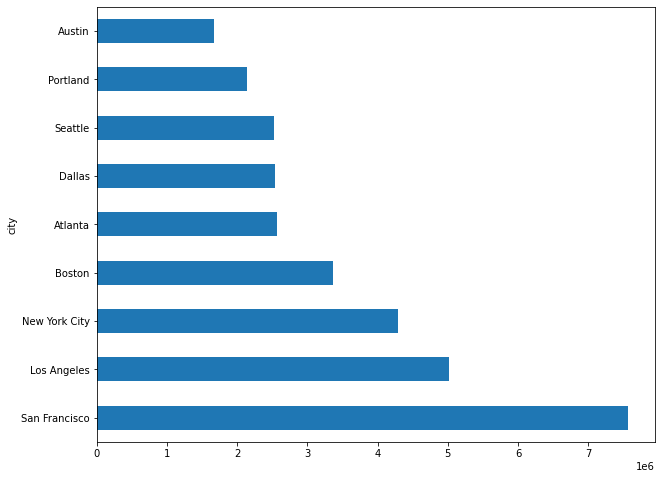

In [41]:
All_Sales_Data.groupby('city').sum()["Total"].sort_values(ascending=False).plot.barh(figsize=(10, 8))

San Francisco est la cité qui as enregistré la valeur maximum

In [42]:
All_Sales_Data['heure'] = All_Sales_Data.index.hour


In [54]:
All_Sales_Data

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Mois,city,Total,heure
Order Date,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,New York City,11.99,3
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,San Francisco,11.95,3
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,New York City,150.00,4
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,Dallas,2.99,5
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,Atlanta,23.90,6
...,...,...,...,...,...,...,...,...,...
2020-01-01 04:13:00,304165,AAA Batteries (4-pack),1,2.99,"825 Adams St, Portland, OR 97035",January,Portland,2.99,4
2020-01-01 04:21:00,299125,USB-C Charging Cable,1,11.95,"754 Hickory St, New York City, NY 10001",January,New York City,11.95,4
2020-01-01 04:54:00,305840,Bose SoundSport Headphones,1,99.99,"784 River St, San Francisco, CA 94016",January,San Francisco,99.99,4


In [44]:
All_Sales_Data.groupby('heure')['Total'].sum().sort_values(ascending=False)

heure
19    2211731.57
12    2120738.95
20    2101122.88
11    2097723.63
18    2031009.01
17    1958953.68
13    1957076.82
14    1919163.74
21    1883829.00
10    1785831.83
15    1784071.16
16    1753355.57
9     1514981.59
22    1479522.64
8     1095690.63
23    1084946.93
7      689793.55
0      658327.88
1      424918.30
6      411004.69
2      215468.56
5      213063.79
4      153357.87
3      137288.40
Name: Total, dtype: float64

In [45]:
chifaf_heure = pd.DataFrame(All_Sales_Data.groupby('heure')['Total'].sum())

In [46]:
chifaf_heure

,Total
heure,
0,658327.88
1,424918.30
2,215468.56
3,137288.40
4,153357.87
5,213063.79
6,411004.69
7,689793.55
8,1095690.63


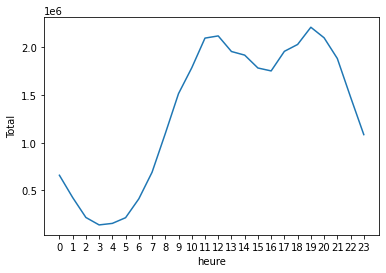

In [62]:
sns.lineplot(data=chifaf_heure['Total'])
plt.xticks(ticks=range(0, 24))
plt.show()

La publicité dois etre effectuée entre 10 et 11 heure aussi à 19h

<AxesSubplot:xlabel='Product'>

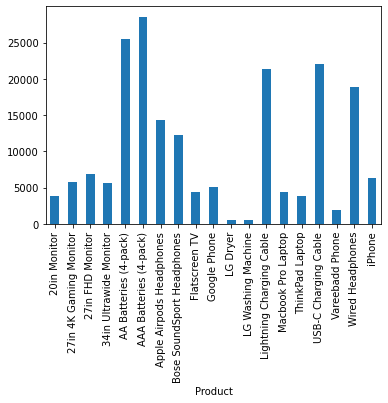

In [64]:
All_Sales_Data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

# QUELLES SONT LES COMBINAISONS DE PRODUIT QUI SE VENDENT LE PLUS

In [65]:
dt=All_Sales_Data[All_Sales_Data['Order ID'].duplicated(keep=False)]

In [69]:
#Création de la colonne combinaison

dt['Combinaison']=dt.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

C:\Users\sance\AppData\Local\Temp/ipykernel_55264/3564745954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Combinaison']=dt.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [70]:
dt

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Mois,city,Total,heure,Combinaison
Order Date,,,,,,,,,,
2019-01-01 07:29:00,144804,Wired Headphones,1,11.99,"628 Lake St, New York City, NY 10001",January,New York City,11.99,7,"Wired Headphones,iPhone"
2019-01-01 07:29:00,144804,iPhone,1,700.00,"628 Lake St, New York City, NY 10001",January,New York City,700.00,7,"Wired Headphones,iPhone"
2019-01-01 11:25:00,148074,USB-C Charging Cable,1,11.95,"6 Johnson St, Atlanta, GA 30301",January,Atlanta,11.95,11,"USB-C Charging Cable,Google Phone"
2019-01-01 11:25:00,148074,Google Phone,1,600.00,"6 Johnson St, Atlanta, GA 30301",January,Atlanta,600.00,11,"USB-C Charging Cable,Google Phone"
2019-01-01 12:02:00,148450,iPhone,1,700.00,"761 Lakeview St, Dallas, TX 75001",January,Dallas,700.00,12,"iPhone,Lightning Charging Cable"
...,...,...,...,...,...,...,...,...,...,...
2020-01-01 00:10:00,311386,Apple Airpods Headphones,1,150.00,"730 Pine St, San Francisco, CA 94016",January,San Francisco,150.00,0,"iPhone,Apple Airpods Headphones"
2020-01-01 00:22:00,297817,iPhone,1,700.00,"519 13th St, New York City, NY 10001",January,New York City,700.00,0,"iPhone,Lightning Charging Cable"
2020-01-01 00:22:00,297817,Lightning Charging Cable,2,14.95,"519 13th St, New York City, NY 10001",January,New York City,29.90,0,"iPhone,Lightning Charging Cable"


In [71]:
# Je m'interesse maintenant au Order ID et Combinaison
dt2=dt.drop_duplicates(subset=['Order ID'])

In [72]:
dt2

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Mois,city,Total,heure,Combinaison
Order Date,,,,,,,,,,
2019-01-01 07:29:00,144804,Wired Headphones,1,11.99,"628 Lake St, New York City, NY 10001",January,New York City,11.99,7,"Wired Headphones,iPhone"
2019-01-01 11:25:00,148074,USB-C Charging Cable,1,11.95,"6 Johnson St, Atlanta, GA 30301",January,Atlanta,11.95,11,"USB-C Charging Cable,Google Phone"
2019-01-01 12:02:00,148450,iPhone,1,700.00,"761 Lakeview St, Dallas, TX 75001",January,Dallas,700.00,12,"iPhone,Lightning Charging Cable"
2019-01-01 12:51:00,144679,USB-C Charging Cable,1,11.95,"984 Lakeview St, San Francisco, CA 94016",January,San Francisco,11.95,12,"USB-C Charging Cable,Google Phone"
2019-01-01 12:57:00,147451,Google Phone,1,600.00,"229 Elm St, New York City, NY 10001",January,New York City,600.00,12,"Google Phone,Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 20:51:00,301832,20in Monitor,2,109.99,"774 Washington St, San Francisco, CA 94016",December,San Francisco,219.98,20,"20in Monitor,AAA Batteries (4-pack)"
2019-12-31 22:04:00,311036,Macbook Pro Laptop,1,1700.00,"138 Lincoln St, Los Angeles, CA 90001",December,Los Angeles,1700.00,22,"Macbook Pro Laptop,AAA Batteries (4-pack)"
2020-01-01 00:10:00,311386,iPhone,1,700.00,"730 Pine St, San Francisco, CA 94016",January,San Francisco,700.00,0,"iPhone,Apple Airpods Headphones"


<AxesSubplot:ylabel='Combinaison'>

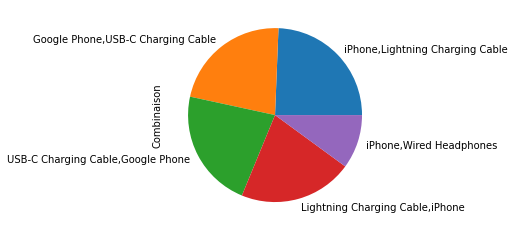

In [77]:
dt2['Combinaison'].value_counts()[0:5].plot.pie()

In [78]:
dt2['Combinaison'].value_counts()

iPhone,Lightning Charging Cable                                                           434
Google Phone,USB-C Charging Cable                                                         396
USB-C Charging Cable,Google Phone                                                         395
Lightning Charging Cable,iPhone                                                           377
iPhone,Wired Headphones                                                                   179
                                                                                         ... 
LG Washing Machine,AAA Batteries (4-pack)                                                   1
Google Phone,Wired Headphones,Lightning Charging Cable,Apple Airpods Headphones,iPhone      1
Wired Headphones,LG Dryer                                                                   1
Vareebadd Phone,27in 4K Gaming Monitor,Wired Headphones                                     1
Vareebadd Phone,Flatscreen TV                               